In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 5 類 為 dog


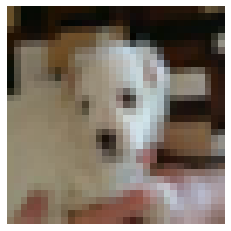

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import DenseNet121
cnn = DenseNet121(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = BatchNormalization()(cnn.output)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_ResNet121.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.00001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=300,
          validation_split=0.1, callbacks=callback)

Epoch 1/300
150/150 [==============================] - 7s 44ms/step - loss: 2.2164 - accuracy: 0.2095 - val_loss: 1.9879 - val_accuracy: 0.2958
Epoch 2/300
150/150 [==============================] - 5s 30ms/step - loss: 1.8867 - accuracy: 0.3320 - val_loss: 1.7915 - val_accuracy: 0.3782
Epoch 3/300
150/150 [==============================] - 5s 30ms/step - loss: 1.7419 - accuracy: 0.3855 - val_loss: 1.6636 - val_accuracy: 0.4242
Epoch 4/300
150/150 [==============================] - 5s 31ms/step - loss: 1.6459 - accuracy: 0.4211 - val_loss: 1.5649 - val_accuracy: 0.4594
Epoch 5/300
150/150 [==============================] - 5s 30ms/step - loss: 1.5779 - accuracy: 0.4457 - val_loss: 1.4965 - val_accuracy: 0.4788
Epoch 6/300
150/150 [==============================] - 5s 30ms/step - loss: 1.5289 - accuracy: 0.4637 - val_loss: 1.4495 - val_accuracy: 0.4896
Epoch 7/300
150/150 [==============================] - 5s 30ms/step - loss: 1.4855 - accuracy: 0.4779 - val_loss: 1.4141 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1008 - accuracy: 0.6150


[1.1008329391479492, 0.6150000095367432]

In [11]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[2.94873584e-03, 8.81027579e-02, 2.94808801e-02, ...,
        4.74225469e-02, 1.19105205e-02, 5.64395823e-02],
       [4.94900644e-02, 3.96694183e-01, 5.05365082e-04, ...,
        1.78021473e-05, 5.45777917e-01, 6.84510591e-03],
       [1.73982993e-01, 8.64422973e-03, 2.62775156e-03, ...,
        1.17649678e-02, 7.36557424e-01, 1.73965804e-02],
       ...,
       [1.13807233e-04, 3.36364137e-05, 1.99179929e-02, ...,
        1.95665341e-02, 4.47601669e-05, 7.10228400e-04],
       [2.08148256e-01, 3.33770886e-02, 4.58362907e-01, ...,
        6.99499771e-02, 1.12156139e-03, 2.67162896e-03],
       [5.83103392e-04, 2.32550618e-03, 1.50979194e-03, ...,
        9.61631835e-01, 9.94004426e-04, 2.14716629e-03]], dtype=float32)

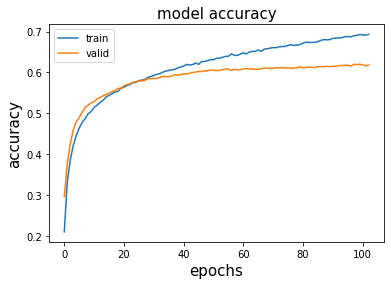

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

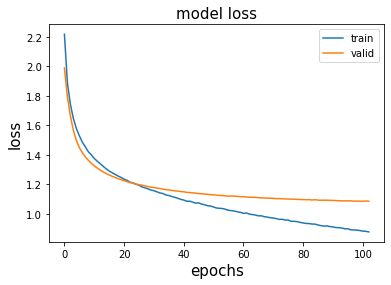

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 加了 Adam(learning_rate=0.0001)之後可以讓整體機率提升
#### val_accuracy =0.587
#### 去掉一個 Dense 128 val_accuracy=0.568
#### 加了 dorpout(0.25) val_accuracy=0.59
#### 加了 batch_normlization val_accuracy=0.61
#### Adam(learning_rate=0.1) 由 0.001 改成 0.1 val_accuracy=0.097
#### Adam(learning_rate=0.0001) 由 0.1 改成 0.0001 val_accuracy=0.61
#### Adam(learning_rate=0.00001) 由 0.001 改成 0.00001 val_accuracy=0.6190
#### epochs=300, 最後在 103 停下, val_accuracy=0.6184